# Assignment 10

In [1]:
import numpy as np 
np.set_printoptions(threshold=10) # printing setup
import matplotlib.pyplot as plt

In [2]:
# This formula shall be imitated by the neural network
def formula_1(x):
    return x + 0.75

# This formula shall be imitated by the neural network, too
def formula_2(x):
    return(np.sin(x) + 0.5)

In [3]:
# Input data
X = np.random.uniform(low=-0.5, high=1.55, size=100)# make 100 uniformly distributed samples
X = X.reshape(-1, 1) # -1 indicates "as many rows as required"
X # input data as column vector

array([[ 0.82715563],
       [ 0.44032105],
       [ 0.85546626],
       ...,
       [ 0.0753536 ],
       [ 0.77733174],
       [-0.18487585]])

In [4]:
# Target values with formula_1
y_1 = np.array([formula_1(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_1 = y_1.reshape(-1, 1)
y_1 # target data as column vector

array([[1.57715563],
       [1.19032105],
       [1.60546626],
       ...,
       [0.8253536 ],
       [1.52733174],
       [0.56512415]])

In [5]:
# Target values with formula_2
y_2 = np.array([formula_2(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_2 = y_2.reshape(-1, 1)
y_2 # target data as column vector

array([[1.23600879],
       [0.92622992],
       [1.2548768 ],
       ...,
       [0.57528231],
       [1.20138001],
       [0.3161755 ]])

### Code below contains the parts to be edited

Imitation of formula 'x+0.75'
Weight_1:1.0
Weight_2:1.0
Bias:1.0


C:\Users\leela\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\leela\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


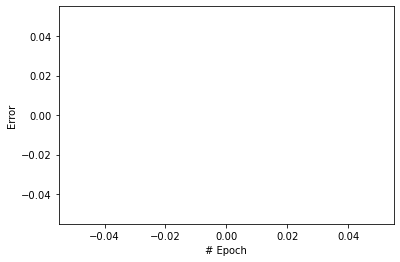

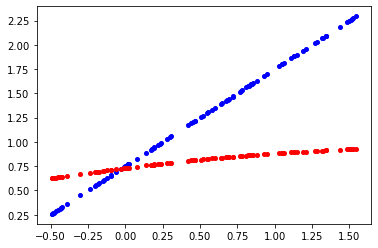


Imitation of formula 'sin(x)+0.5'
Weight_1:1.0
Weight_2:1.0
Bias:1.0


C:\Users\leela\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\leela\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


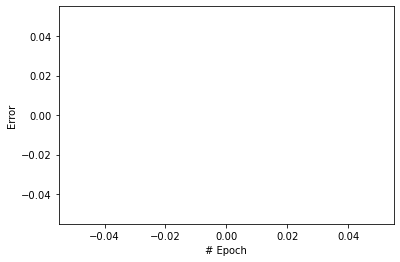

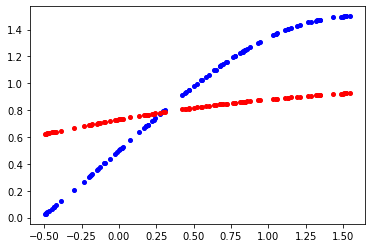

In [12]:
# Simple neural-network based regressor
class NeuralNetwork:
    
    # Function called at object initialization
    def __init__(self):
        
        # These are members of the class. You can access them in every method by "self.var_name" and from outside the class with "instance_name.var_name"
        
        # Sample to compute pass with
        self.X          = 0.0 # set me!
        self.y          = 0.0 # set me!
        
        # Parameters to be learned
        self.weight_1   = 1.0 # teach me!
        self.weight_2   = 1.0 # teach me!
        self.bias       = 1.0 # teach me!
        
        # State information
        self.hidden     = 0.0 # use me!
        self.output     = 0.0 # use me!
        self.error      = 0.0 # use me!
        
    # Set sample to be used in feed-forward and back-propagation pass
    def set_sample(self, X, y):
        self.X = float(X)
        self.y = float(y)
        
    # (a) Feed-forward pass
    def feed_forward(self):
        
        # TODO: Feed-forward pass and error estimation, store results in state information members
        # Consider the loss function: 0.5 ∗ (𝑡𝑎𝑟𝑔𝑒𝑡 − 𝑜𝑢𝑡𝑝𝑢𝑡)2
        
        self.hidden = 1/(1+np.exp(-((self.X * self.weight_1)+self.bias)))
        self.output = self.hidden * self.weight_2
        self.error = (0.5)*(self.y - self.output)**2
         # remove this line, just here to produce no compile error in initial setup
      
    # (b) Back-propagation pass
    def back_prop(self):
        
        # TODO: Derivations of parameters
        # TODO: Update the parameters with learning rate of 0.01
        
        self.error = (0.5)*(self.y - self.output)**2
        delta = self.error * (1/(1+np.exp(-((self.hidden * self.weight_1)+self.bias))))
        self.weight_1 = self.weight_1 + (0.01) * np.dot(self.X, delta)
        self.weight_2 = self.weight_2 + (0.01) * np.dot(self.y, delta)
        
        # remove this line, just here to produce no compile error in initial setup
        
def execute_nn(X, y):
    
    # Instantiate neural network
    nn = NeuralNetwork()
    
    # Collect mean error of each epoch to plot it later
    epoch_error = []

    # Perform multiple epochs, aka inputting the dataset multiple times
    
    for epoch in range(0,100):
        nn.feed_forward()
        nn.back_prop()
        epoch_error.append(np.average(np.abs(epoch_error)))

        # Example use of neural network class
        # nn = NeuralNetwork() # instantiates neural network
        # nn.set_sample(2,5) # sets sample with 2 as input and 5 as target
        # nn.feed_forward() # perform feed-forward to calculate output
        # nn.back_prop() # use difference between target and actual output to update parameters
        #Remember final error of each epoch in "epoch_error"
            
        
        # remove this line, just here to produce no compile error in initial setup
        
    # Print final parameters of trained neural network
    print("Weight_1:"+ str(nn.weight_1))
    print("Weight_2:" + str(nn.weight_2))
    print("Bias:" + str(nn.bias))
    
    # Plot epoch errors with logarithmic transformation
    plt.plot(list(range(len(epoch_error))), np.log(epoch_error))
    ax = plt.gca()
    ax.set_xlabel('# Epoch')
    ax.set_ylabel('Error')
    plt.show()
    
    # Plot datapoints as originally transformed and as transformed by neural network
    computed = []
    for i in range(0, X.shape[0]):
        nn.set_sample(X[i], y[i])
        nn.feed_forward()
        computed.append(nn.output)
    plt.scatter(X.transpose().flatten(), y.transpose().flatten(), c='blue', s=16)
    plt.scatter(X.transpose().flatten(), computed, c='red', s=16)
    plt.show()

print("Imitation of formula 'x+0.75'")
execute_nn(X,y_1)
print()
print("Imitation of formula 'sin(x)+0.5'")
execute_nn(X,y_2)